# Lab 3

We created a set of box plots for the values in the `saleprice` column separated by `condition` from the `df_redux` DataFrame using `sns.boxplot(x="saleprice", y="condition", data=df_redux)`. Prior to that, when working with bar charts, we specified an ordering for the categorical data using the `order` keyword argument. Now review the `landuse` codes using the `value_counts()` method. Determine how to combine similar codes, and then create a new column called `landuse2` containing no more than 20 codes (you can combine rarely used codes in the dataset into a generic category named "Other"). Next, modify the box plot so that the `landuse` categories are ordered by median sale price from least to greatest. See the image below for an example of what the plot should resemble.

<figure>
<img src="../images/03-boxplots.png" alt="box plots for sale price by land use">
<figcaption style="text-align: center; font-weight: bold">Lab 1 - Box plots for sale price by land use sorted by median sale price</figcaption>
</figure>

In [3]:
#import pandas
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

In [4]:
# indicate that the plot should appear as static images in the notebook.
%matplotlib inline

In [5]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/output.sqlite')
query = "SELECT * from pit_df;"
pit_df = pd.read_sql_query(query, con=engine)
display(pit_df.head())

,level_0,index,acreage,airconditioning,annualtaxes,appraisedtaxablebuilding,appraisedtaxableland,area,bathrooms,bedrooms,cauv,condition,county,dwellingtype,fireplaceopenings,fireplacesflag,grade,heat,landuse,legaldescription,neighborhoodcode,ownername,parcelnumber,rooms,saleprice,schooldistrict,taxdesignation,transferdate,uspscity,unnamed: 0,walltype,yearbuilt,month,countyfips,nielsen_rank,median_listing_price,active_listing_count_,days_on_market_,new_listing_count_,price_increase_count_,price_decrease_count_,pending_listing_count_,avg_listing_price,total_listing_count,pending_ratio
0,0,0,0.0,1.0,874.88,40300.0,22600.0,1848.0,1.0,5.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,510.0,145 N EUREKA AVE,9400.0,WARREN SUSANNA K,010-000045,9.0,0.0,COLUMBUS CSD,CITY OF COLUMBUS,7/28/2011,COLUMBUS,0.0,1.0,1903.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022
1,1,1,0.0,1.0,572.9,26400.0,6800.0,1184.0,1.0,2.0,0.0,F,Franklin,1.0,0.0,0,C-1,1,510.0,801 MILLER AVE,1500.0,QUIGLEY ENTERPRISES LLC,010-000061,5.0,55000.0,COLUMBUS CSD,CITY OF COLUMBUS,1/14/2015,COLUMBUS,1.0,1.0,1913.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022
2,2,2,0.0,NaN,141.38,6500.0,3200.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,599.0,1054 THOMAS AVENUE,9100.0,HARSHAW INNOCENT C,010-000103,NaN,15000.0,COLUMBUS CSD,CITY OF COLUMBUS,12/4/2008,COLUMBUS,2.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022
3,3,3,0.0,1.0,1671.6,77000.0,14500.0,2186.0,2.0,4.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,520.0,1572 FRANKLIN AVE,1201.0,CENTRAL OHIO COMMUNITY IM,010-000004,8.0,0.0,COLUMBUS CSD,CITY OF COLUMBUS,4/13/2015,COLUMBUS,3.0,1.0,1900.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022
4,4,4,0.0,NaN,190.96,8800.0,8800.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,500.0,1421 N 5TH ST,1306.0,COLUMBUS AFFORDABLE,010-000135,NaN,12000.0,COLUMBUS CSD,CITY OF COLUMBUS,11/3/2010,COLUMBUS,4.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022


In [6]:
pit_df.landuse.value_counts()

510.0                                        27474
550.0                                         4328
510 Single family platted lot                 3873
510                                           3256
520.0                                         1262
511.0                                         1204
511                                           1140
500.0                                         1109
511 Single family unplatted 0-09.9            1077
553.0                                          695
551.0                                          410
550 Condominium Residential Unit               362
501.0                                          259
552.0                                          214
550                                            177
111 CAUV general farm                          159
599.0                                          156
520 Two family platted lot                     109
512 Single family unplatted 10-19.             102
559.0                          

In [7]:
#first, create the landuse2 column and just copy what is in landuse before modifying
pit_df['landuse2'] = pit_df['landuse']

In [8]:
display(pit_df.head())

,level_0,index,acreage,airconditioning,annualtaxes,appraisedtaxablebuilding,appraisedtaxableland,area,bathrooms,bedrooms,cauv,condition,county,dwellingtype,fireplaceopenings,fireplacesflag,grade,heat,landuse,legaldescription,neighborhoodcode,ownername,parcelnumber,rooms,saleprice,schooldistrict,taxdesignation,transferdate,uspscity,unnamed: 0,walltype,yearbuilt,month,countyfips,nielsen_rank,median_listing_price,active_listing_count_,days_on_market_,new_listing_count_,price_increase_count_,price_decrease_count_,pending_listing_count_,avg_listing_price,total_listing_count,pending_ratio,landuse2
0,0,0,0.0,1.0,874.88,40300.0,22600.0,1848.0,1.0,5.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,510.0,145 N EUREKA AVE,9400.0,WARREN SUSANNA K,010-000045,9.0,0.0,COLUMBUS CSD,CITY OF COLUMBUS,7/28/2011,COLUMBUS,0.0,1.0,1903.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,510.0
1,1,1,0.0,1.0,572.9,26400.0,6800.0,1184.0,1.0,2.0,0.0,F,Franklin,1.0,0.0,0,C-1,1,510.0,801 MILLER AVE,1500.0,QUIGLEY ENTERPRISES LLC,010-000061,5.0,55000.0,COLUMBUS CSD,CITY OF COLUMBUS,1/14/2015,COLUMBUS,1.0,1.0,1913.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,510.0
2,2,2,0.0,NaN,141.38,6500.0,3200.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,599.0,1054 THOMAS AVENUE,9100.0,HARSHAW INNOCENT C,010-000103,NaN,15000.0,COLUMBUS CSD,CITY OF COLUMBUS,12/4/2008,COLUMBUS,2.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,599.0
3,3,3,0.0,1.0,1671.6,77000.0,14500.0,2186.0,2.0,4.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,520.0,1572 FRANKLIN AVE,1201.0,CENTRAL OHIO COMMUNITY IM,010-000004,8.0,0.0,COLUMBUS CSD,CITY OF COLUMBUS,4/13/2015,COLUMBUS,3.0,1.0,1900.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,520.0
4,4,4,0.0,NaN,190.96,8800.0,8800.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,500.0,1421 N 5TH ST,1306.0,COLUMBUS AFFORDABLE,010-000135,NaN,12000.0,COLUMBUS CSD,CITY OF COLUMBUS,11/3/2010,COLUMBUS,4.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,500.0


In [9]:
pit_df.landuse2.describe()

count     47969
unique       79
top       510.0
freq      27474
Name: landuse2, dtype: object

In [10]:
pit_df.landuse.describe()

count     47969
unique       79
top       510.0
freq      27474
Name: landuse, dtype: object

In [11]:
# Based on the values, I believe I can truncate and only take the left 3 bytes of the landuse2 field.  
# That will eliminate the .0 and descriptions
pit_df['landuse2'] = pit_df.landuse.str[:3]

In [12]:
pit_df.landuse2.value_counts()

510    34603
550     4867
511     3421
520     1431
500     1110
553      695
551      410
501      261
552      214
512      164
111      159
599      158
530      107
559       98
591       57
513       24
101       23
521       21
122       18
560       17
502       14
503        9
505        8
585        8
499        7
680        6
541        6
429        5
514        5
455        5
515        3
470        3
401        3
112        2
199        2
190        2
685        2
561        2
420        2
542        2
531        2
110        1
121        1
640        1
412        1
439        1
691        1
555        1
504        1
481        1
592        1
540        1
100        1
113        1
Name: landuse2, dtype: int64

In [13]:
# Now replace the rarely used codes such that we only have 20 land use codes. 
# NOTE that this is very much like Exercise 5 from the practices exercises of Unit 3

repl = {'560':'Other','502':'Other','503':'Other','505':'Other','585':'Other','499':'Other','680':'Other',
        '541':'Other','429':'Other','514':'Other','455':'Other','515':'Other','401':'Other','470':'Other',
        '112':'Other','531':'Other','199':'Other','420':'Other','190':'Other','685':'Other','561':'Other',
        '542':'Other','592':'Other','110':'Other','412':'Other','555':'Other','640':'Other','121':'Other',
        '691':'Other','540':'Other','100':'Other','481':'Other','439':'Other','113':'Other','504':'Other'}
pit_df = pit_df.replace({'landuse2':repl})
pit_df.landuse2.value_counts()

510      34603
550       4867
511       3421
520       1431
500       1110
553        695
551        410
501        261
552        214
512        164
111        159
599        158
Other      128
530        107
559         98
591         57
513         24
101         23
521         21
122         18
Name: landuse2, dtype: int64

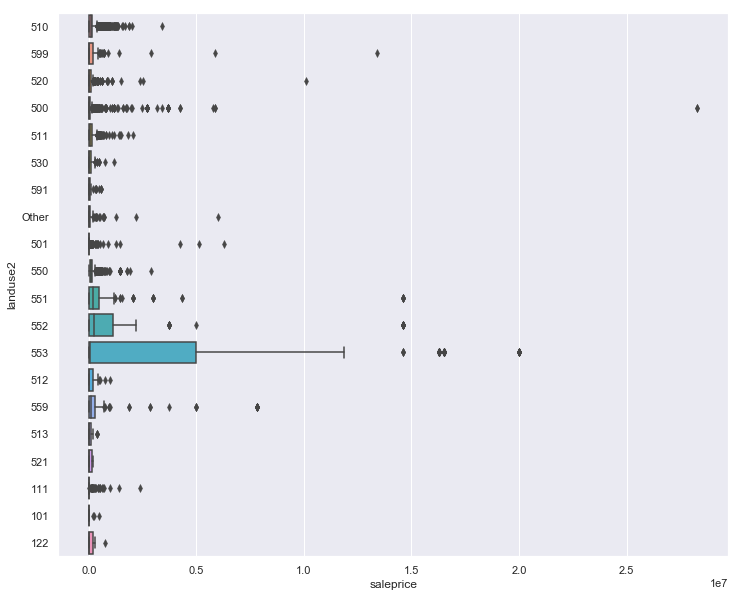

In [16]:
# Recreate the box plot without median or ordering
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

sns.boxplot(x="saleprice", y="landuse2", data=pit_df)

In [27]:
#Wow I see some outliers on saleprice. Let's take a look at the values

pit_df.query('saleprice > 10000000')

,level_0,index,acreage,airconditioning,annualtaxes,appraisedtaxablebuilding,appraisedtaxableland,area,bathrooms,bedrooms,cauv,condition,county,dwellingtype,fireplaceopenings,fireplacesflag,grade,heat,landuse,legaldescription,neighborhoodcode,ownername,parcelnumber,rooms,saleprice,schooldistrict,taxdesignation,transferdate,uspscity,unnamed: 0,walltype,yearbuilt,month,countyfips,nielsen_rank,median_listing_price,active_listing_count_,days_on_market_,new_listing_count_,price_increase_count_,price_decrease_count_,pending_listing_count_,avg_listing_price,total_listing_count,pending_ratio,landuse2
321,321,321,0.0,1.0,3103.88,143000.0,26700.0,2009.0,2.0,7.0,0.0,A,Franklin,1.0,0.0,0,C+1,1,520.0,88-90 MC MILLAN AVE,1300.0,WINKLE OSU LLC,010-006129,13.0,10100000.0,COLUMBUS CSD,CITY OF COLUMBUS,12/14/2007,COLUMBUS,321.0,1.0,1810.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,520
941,941,941,0.0,NaN,649.18,6000.0,6000.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,500.0,107 E 3RD AVE,1302.0,COMMUNITY PROPERTIES OF,010-015839,NaN,28295497.0,COLUMBUS CSD,CITY OF COLUMBUS,4/30/2003,COLUMBUS,941.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,500
1075,1075,1075,0.0,NaN,855.02,39400.0,23200.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,599.0,OBETZ ROAD REAR,7401.0,CHS OF DAYTON REAL ESTATE,010-018937,NaN,13388000.0,COLUMBUS CSD,CITY OF COLUMBUS,1/10/2013,COLUMBUS,1075.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,599
1728,1728,1728,0.0,NaN,286.46,13200.0,13200.0,NaN,0.0,NaN,0.0,None,Franklin,None,0.0,0,None,1,500.0,1329-1/2 N 5TH ST,1306.0,COMMUNITY PROPERTIES OF,010-024552,NaN,28295497.0,COLUMBUS CSD,CITY OF COLUMBUS,4/30/2003,COLUMBUS,1728.0,None,NaN,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,500
13058,13058,13058,0.0,2.0,623.12,28700.0,5500.0,652.0,1.0,1.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257527,3.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13058.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553
13063,13063,13063,0.0,2.0,744.66,34300.0,5500.0,816.0,1.0,1.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257492,3.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13063.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553
13065,13065,13065,0.0,2.0,623.12,28700.0,5500.0,652.0,1.0,1.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257578,3.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13065.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553
13066,13066,13066,0.0,2.0,779.38,35900.0,5500.0,903.0,2.0,2.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257596,4.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13066.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553
13067,13067,13067,0.0,2.0,623.12,28700.0,5500.0,652.0,1.0,1.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257547,3.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13067.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553
13068,13068,13068,0.0,2.0,805.42,37100.0,5500.0,960.0,2.0,2.0,0.0,A,Franklin,1.0,0.0,0,C-1,1,553.0,TEMPLETON CROSSING,9602.0,BROOKVIEW TEMPLETON LLC,010-257631,4.0,16300000.0,COLUMBUS CSD,CITY OF COLUMBUS,8/29/2014,COLUMBUS,13068.0,1.0,2001.0,2019-03-01,39049.0,29.0,239850.0,3239.0,37.0,1612.0,80.0,572.0,7.0,317211.0,3246.0,0.0022,553


In [28]:
pit_df.saleprice.describe()

count    4.692900e+04
mean     1.662807e+05
std      8.808015e+05
min      0.000000e+00
25%      0.000000e+00
50%      7.700000e+04
75%      1.570000e+05
max      2.829550e+07
Name: saleprice, dtype: float64

In [37]:
# I am going to try what we did in the exercises by eliminating the 1st and 4th quartile
# NOTE this is in the histograms section of the exercises
pit_df = pit_df[pit_df.saleprice > 0.0]
pit_df = pit_df[pit_df.saleprice < 1500000]
pit_df.saleprice.describe()

count    3.061400e+04
mean     1.555166e+05
std      1.348502e+05
min      1.000000e+00
25%      7.800000e+04
50%      1.295000e+05
75%      1.899000e+05
max      1.474000e+06
Name: saleprice, dtype: float64

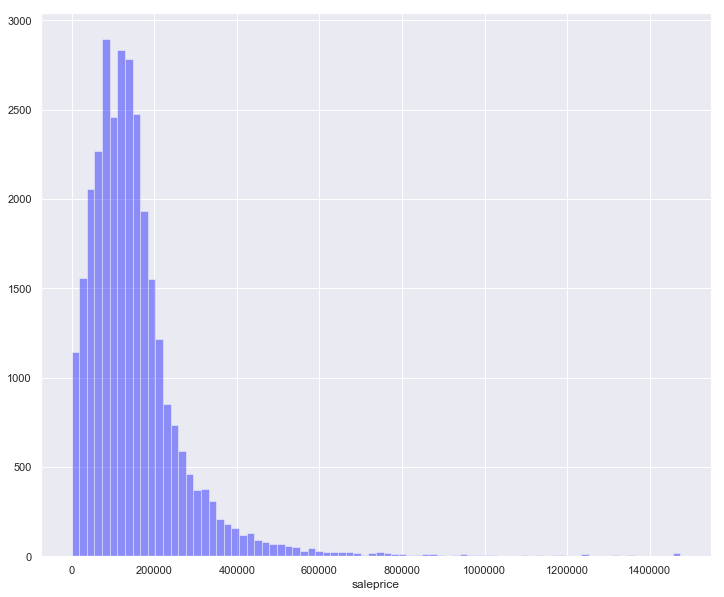

In [39]:
display(sns.distplot(pit_df.saleprice, kde=False, bins=80, color='blue'))

In [40]:
# Now get the median by creating a pivot table 30.04.11
# See Exercises on Pivot Tables
import numpy as np
#pivot = (pit_df.pivot_table(index=["landuse2"],value=["saleprice"],medianprice=pd.np.median).sort_values(by="saleprice"))

pivot = pit_df.pivot_table(index="landuse2", values="saleprice", aggfunc=pd.np.median).sort_values(by="saleprice")
display(pivot)

,saleprice
landuse2,
591,45000.0
500,53942.0
501,75000.0
520,79000.0
Other,91331.0
530,108250.0
550,117600.0
510,132400.0
511,135000.0


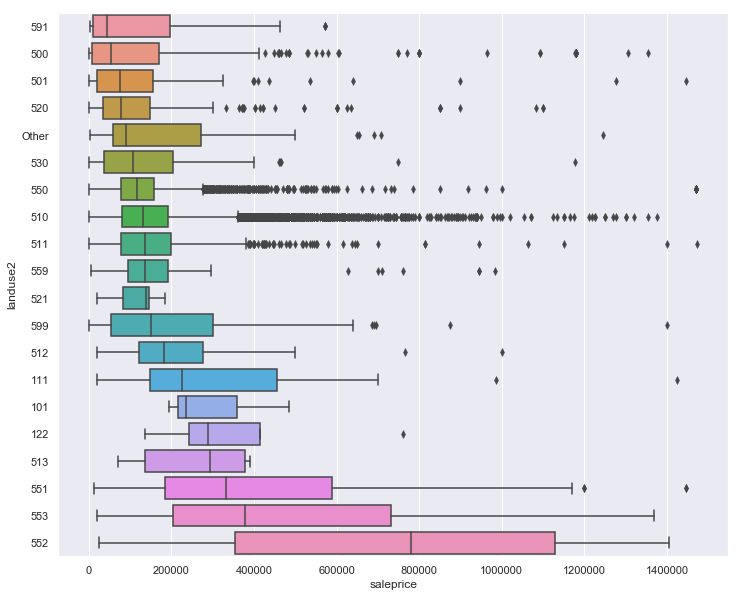

In [41]:
sns.boxplot(x="saleprice",y="landuse2",data=pit_df,order=pivot.index)